### Load and Preprocess the Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
train_data_cleaned = pd.read_csv("C:/project/fashion-recommender-system/data/processed/fashion-mnist_train_cleaned.csv")

# Separate features and labels
X = train_data_cleaned.iloc[:, 1:].values  # Pixel values
y = train_data_cleaned.iloc[:, 0].values  # Labels (assuming the first column is the label)

# Normalize pixel values (0-255 to 0-1)
X = X / 255.0

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")


Training set size: (47965, 784)
Validation set size: (11992, 784)


We load the dataset, normalize the pixel values for each image (scaling to the range 0-1), and split it into training and validation sets. Finally, we standardize the features using StandardScaler. This prepares the data for training machine learning models.



### Logistic Regression

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=100, solver='saga', multi_class='multinomial')

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_pred_log_reg = log_reg.predict(X_val)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)
print(f"Logistic Regression Validation Accuracy: {log_reg_accuracy:.4f}")


c:\Users\om\anaconda3\envs\fashion\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Validation Accuracy: 0.8568


c:\Users\om\anaconda3\envs\fashion\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Here, we apply logistic regression using the multinomial solver (saga) to handle multi-class classification. The performance is evaluated using validation accuracy. Logistic Regression provides a good baseline for comparison with more complex models.




###  Support Vector Machine (SVM)

In [3]:
from sklearn.svm import SVC

# Initialize Support Vector Machine model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_svm = svm_model.predict(X_val)

# Evaluate the model
svm_accuracy = accuracy_score(y_val, y_pred_svm)
print(f"SVM Validation Accuracy: {svm_accuracy:.4f}")


SVM Validation Accuracy: 0.8439


We implement a linear Support Vector Machine (SVM). This model works well for smaller datasets and linear classification problems. After training, we evaluate its performance using accuracy on the validation set.



### Random Forest Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate the model
rf_accuracy = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Validation Accuracy: {rf_accuracy:.4f}")


Random Forest Validation Accuracy: 0.8797


Random Forest is a versatile and powerful ensemble learning method. It builds multiple decision trees and averages their predictions to improve accuracy and prevent overfitting. The accuracy of this model is compared to previous models.



### Hyperparameter Tuning (Random Forest)

In [5]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
best_rf_accuracy = grid_search.score(X_val, y_val)
print(f"Best Random Forest Validation Accuracy: {best_rf_accuracy:.4f}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Validation Accuracy: 0.8803


GridSearchCV helps find the best hyperparameters for the Random Forest model by evaluating combinations of the number of trees (n_estimators), tree depth (max_depth), and minimum samples for splitting nodes (min_samples_split). The model's performance is measured using cross-validation, and the best combination is selected for final evaluation

###  Save the Best Model

In [6]:
import joblib

# Save the best performing model (Random Forest after GridSearch)
joblib.dump(grid_search.best_estimator_, 'best_rf_model.pkl')


['best_rf_model.pkl']

The best-performing model is saved using joblib, allowing for easy deployment or reuse in a recommendation system later.



### Cross-Validation

In [7]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on Random Forest model
rf_cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)

print(f"Cross-Validation Scores: {rf_cv_scores}")
print(f"Mean CV Score: {np.mean(rf_cv_scores):.4f}")


Cross-Validation Scores: [0.88116335 0.8739706  0.88866882 0.87991244 0.87668091]
Mean CV Score: 0.8801


This step applies k-fold cross-validation (k=5) to ensure the model’s robustness and generalization ability. Cross-validation helps mitigate issues with overfitting by training the model on different subsets of the training data.



### Feature Importance (For Random Forest)

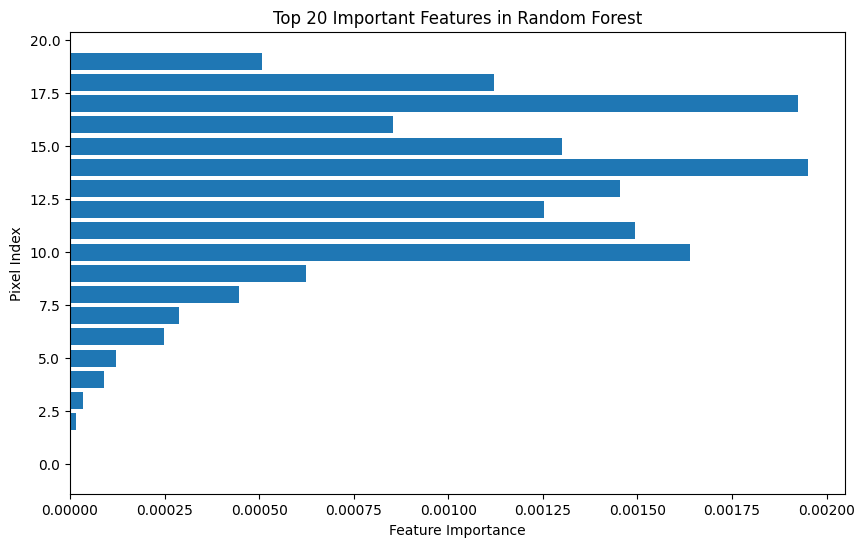

In [8]:
import matplotlib.pyplot as plt

# Extract feature importances from the Random Forest model
importances = grid_search.best_estimator_.feature_importances_

# Plot the top 20 important features
plt.figure(figsize=(10, 6))
plt.barh(range(20), importances[:20], align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Pixel Index")
plt.title("Top 20 Important Features in Random Forest")
plt.show()


This step highlights the most important features (pixels) that contribute to the model’s decision-making process. Visualizing feature importance can give insights into how the model interprets the data.

